✅ Libraries imported successfully!
✅ CSV loaded successfully!
✅ Columns cleaned and renamed:
['Company\r (Maker-if known)', 'Specific Bean Origin\r or Bar Name', 'REF', 'Review\r Date', 'Cocoa\r Percent', 'Company\r Location', 'Rating', 'Bean\r Type', 'Broad Bean\r Origin']
✅ Missing values removed!
📊 Total tuples: 1793
⚠️ Column 'Company' not found!
⚠️ Column 'Review_Year' not found!


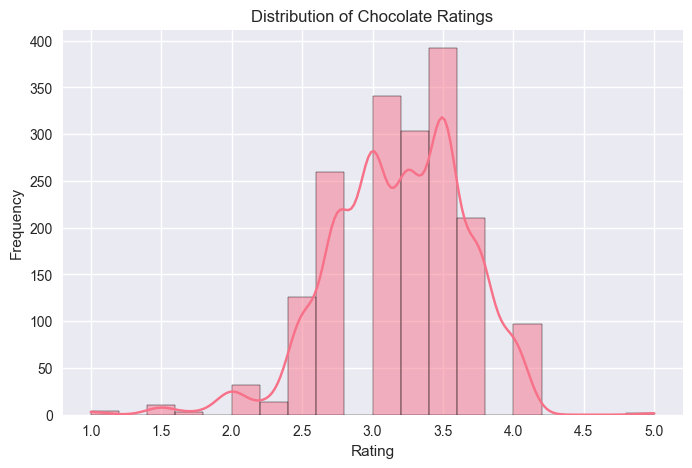

   Rating  Normalized_Rating
0    3.75             0.6875
1    2.75             0.4375
2    3.00             0.5000
3    3.50             0.6250
4    3.50             0.6250


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# ✅ Plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

# -------------------------------
# 1️⃣ Load CSV safely
# -------------------------------
df = pd.read_csv("flavors_of_cacao.csv", encoding='utf-8-sig')  # handles BOM markers
print("✅ CSV loaded successfully!")

# -------------------------------
# 2️⃣ Clean column names
# -------------------------------
df.columns = (
    df.columns
    .str.replace('\xa0', '', regex=True)
    .str.replace('\n', ' ', regex=True)
    .str.strip()
    .str.encode('ascii', 'ignore')  # remove non-ASCII characters
    .str.decode('utf-8')
)

# Rename columns safely
rename_map = {
    "Company (Maker-if known)": "Company",
    "Review Date": "Review_Year",
    "Company Location": "Company_Location",
    "Cocoa Percent": "Cocoa_Percent",
    "Bean Type": "Bean_Type",
    "Broad Bean Origin": "Broad_Bean_Origin"
}
df.rename(columns=rename_map, inplace=True)

print("✅ Columns cleaned and renamed:")
print(df.columns.tolist())

# -------------------------------
# 3️⃣ Drop rows with missing values
# -------------------------------
df_clean = df.dropna()
print("✅ Missing values removed!")
print("📊 Total tuples:", df_clean.shape[0])

# -------------------------------
# 4️⃣ Basic stats with safe column checks
# -------------------------------
if 'Company' in df_clean.columns:
    print("🏭 Unique companies:", df_clean['Company'].nunique())
else:
    print("⚠️ Column 'Company' not found!")

if 'Review_Year' in df_clean.columns:
    print("📅 Reviews in 2013:", df_clean[df_clean['Review_Year'] == 2013].shape[0])
else:
    print("⚠️ Column 'Review_Year' not found!")

if 'Bean_Type' in df.columns:
    print("❓ Missing 'Bean_Type' values:", df['Bean_Type'].isna().sum())

# -------------------------------
# 5️⃣ Rating distribution plot
# -------------------------------
if 'Rating' in df_clean.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df_clean['Rating'], bins=20, kde=True)
    plt.title("Distribution of Chocolate Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("⚠️ Column 'Rating' not found!")

# -------------------------------
# 6️⃣ Cocoa Percent conversion & scatter plot
# -------------------------------
if 'Cocoa_Percent' in df_clean.columns and 'Rating' in df_clean.columns:
    df_clean['Cocoa_Percent'] = df_clean['Cocoa_Percent'].str.replace('%', '').astype(float)
    
    plt.figure(figsize=(8,5))
    plt.scatter(df_clean['Cocoa_Percent'], df_clean['Rating'], alpha=0.3)
    plt.title("Cocoa % vs Rating")
    plt.xlabel("Cocoa Percent")
    plt.ylabel("Rating")
    plt.grid(True)
    plt.show()

# -------------------------------
# 7️⃣ Normalized Rating
# -------------------------------
if 'Rating' in df_clean.columns:
    scaler = MinMaxScaler()
    df_clean['Normalized_Rating'] = scaler.fit_transform(df_clean[['Rating']])
    print(df_clean[['Rating', 'Normalized_Rating']].head())

# -------------------------------
# 8️⃣ Average ratings per company
# -------------------------------
if 'Company' in df_clean.columns and 'Rating' in df_clean.columns:
    avg_ratings = df_clean.groupby('Company')['Rating'].mean().sort_values(ascending=False)
    print("🏆 Top 10 companies by average rating:")
    print(avg_ratings.head(10))

# -------------------------------
# 9️⃣ Encode categorical variables
# -------------------------------
if 'Company' in df_clean.columns and 'Company_Location' in df_clean.columns:
    le_company = LabelEncoder()
    le_location = LabelEncoder()

    df_clean['Company_Encoded'] = le_company.fit_transform(df_clean['Company'])
    df_clean['Location_Encoded'] = le_location.fit_transform(df_clean['Company_Location'])

    print("✅ Categorical encoding complete!")
    print(df_clean[['Company', 'Company_Encoded', 'Company_Location', 'Location_Encoded']].head())
